## Import Modules, Load Data and Data Review

In [1]:
#First, importing the neccesary libaries, such as numpy, pandas
import pandas as pd
import numpy as np

#Importing the plotting libraries, such as matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the scaling libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Importing the evaluation libraries, such as mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

from scipy.stats import skew

#Importing the cross validation
from sklearn.model_selection import cross_validate

#Importing make_column_transformer for tranforming
from sklearn.compose import make_column_transformer

#Importing OneHotEncoder, OrdinalEncoder to use them on the object data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#Importing ResidualsPlot
from yellowbrick.regressor import ResidualsPlot

#Importing PredictionError
from yellowbrick.regressor import PredictionError

#Importing RadViz
from yellowbrick.features import RadViz

#Importing LinearRegression model
from sklearn.linear_model import LinearRegression

#Importing Ridge model
from sklearn.linear_model import Ridge

#Importing GridSearchCV to find the best result from the hyperparameters
from sklearn.model_selection import GridSearchCV

#Importing ValidationCurve
from yellowbrick.model_selection import ValidationCurve

#Importing Lasso model
from sklearn.linear_model import Lasso

#Importing ElasticNet
from sklearn.linear_model import ElasticNet

#Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Importing pipeline
from sklearn.pipeline import Pipeline

#Importing ResidualsPlot
from yellowbrick.regressor import ResidualsPlot

#Importing LazyRegressor
from lazypredict.Supervised import LazyRegressor

#Importing pickle
import pickle

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (14,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
# pip install scikit-learn==1.2.2

In [3]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
alembic                       1.12.0
altair                        4.2.2
anaconda-anon-usage           0.4.3
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-tim

In [4]:
#The test size
t = 0.2
#The random value
s = 101

In [5]:
#Reading the dataset from a csv file
df = pd.read_csv("final_scout_not_dummy.csv")

#Seeing the head of the data set
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [6]:
#Seeing the shape of the data set
df.shape
#As we can see, the shape of the data set is (15915, 23)

(15915, 23)

In [7]:
#Seeing the info of the data set
df.info()
#We can see that, there are about 15915 entries. 23 columns, float64(8), int64(2), object(13).
#There is no null data as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [8]:
#Seeing the description of the dataset
df.describe().T
#We can see that the mean anst std for age, Inspection_new, and Previous_Owners are nearly close to each other

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [9]:
#Checking the duplicated values
df.duplicated().sum()
#As we can see, there are about 1673 duplicated values

1673

In [10]:
#Dropping the duplicated values
df.drop_duplicates(inplace=True)

In [11]:
#Checking the duplicated values after dropping
df.duplicated().sum()
#As we can see, now we have 0 duplicated values

0

In [12]:
#Checking the null values in the data set
df.isnull().sum()
#As we can see, we do not have null values

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [13]:
#Seeing the columns of the data set
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [14]:
#Dropping vat from the dataset
df.drop(columns=["vat", "Displacement_cc", 'body_type', 'Type','Fuel', 'Comfort_Convenience', 'Entertainment_Media', 'Extras','Safety_Security', 'Previous_Owners', 'Inspection_new','Paint_Type', 'Upholstery_type','Drive_chain', 'cons_comb'], inplace=True)

In [15]:
df.head()

,make_model,price,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
0,Audi A1,15770,56013.000,7.000,3.000,66.000,Automatic,1220.000
1,Audi A1,14500,80000.000,7.000,2.000,141.000,Automatic,1255.000
2,Audi A1,14640,83450.000,7.000,3.000,85.000,Automatic,1135.000
3,Audi A1,14500,73000.000,6.000,3.000,66.000,Automatic,1195.000
4,Audi A1,16790,16200.000,7.000,3.000,66.000,Automatic,1135.000


In [16]:
df.columns

Index(['make_model', 'price', 'km', 'Gears', 'age', 'hp_kW', 'Gearing_Type',
       'Weight_kg'],
      dtype='object')

## EDA

### make_model

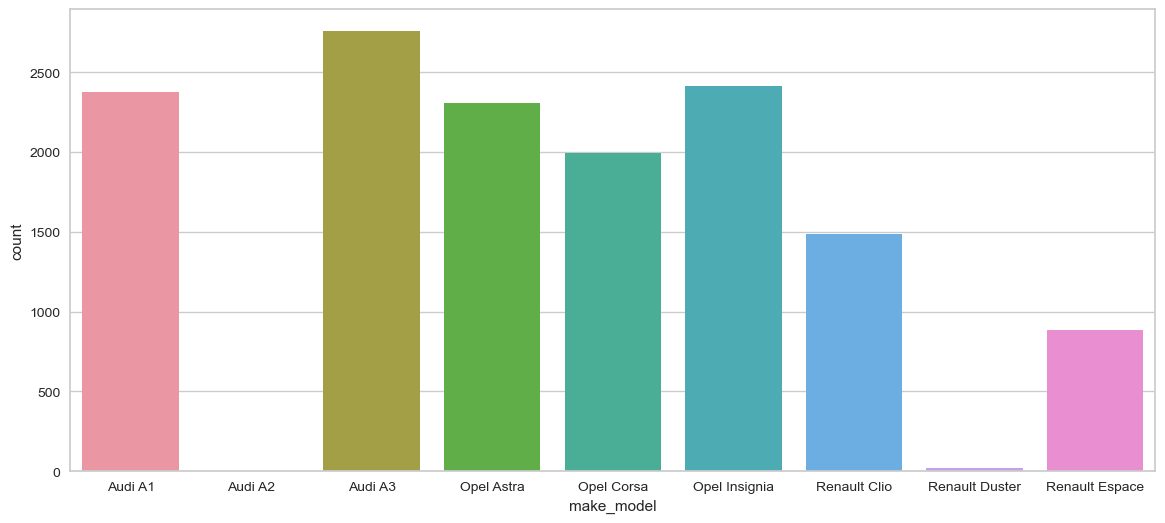

In [17]:
#Seeing the countplot of make_model
sns.countplot(x=df["make_model"])
plt.show()
#As we can see from the graph, we have 9 classes, for Audi A3 and Renault Duster, they are not high at all, and there values
#are so small compared to the others

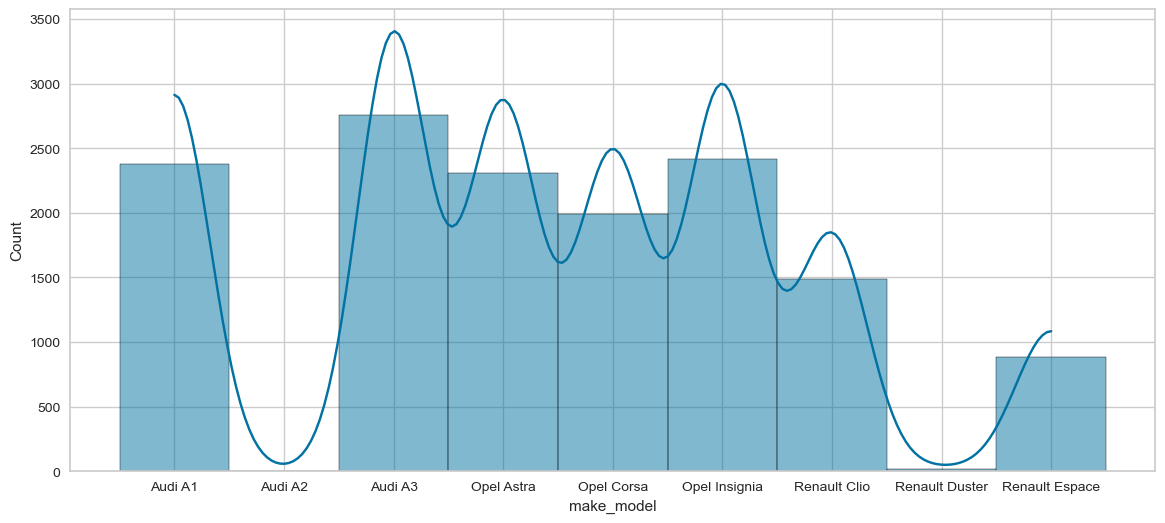

In [18]:
#Seeing the histplot of make_model
sns.histplot(df["make_model"], kde=True)
plt.show()
#We can see the same here as well, the values of Audi A3 and Renault Duster are so small

In [19]:
#Seeing the value counts of make_model
df.make_model.value_counts()
#As we can see, there are some of them have low values, so i am going to drop them (Audi A3 and Renault Duster)

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [20]:
#Making a variable to see the classes that have less than 100, as it may affect the model
low = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
low

Index(['Renault Duster', 'Audi A2'], dtype='object', name='make_model')

In [21]:
#Dropping the low values of make_model
for i in low:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [22]:
#Seeing the value counts of make_model after dropping
df.make_model.value_counts()
#As we can see, now we do not have classes with less than 100

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Name: count, dtype: int64

### price

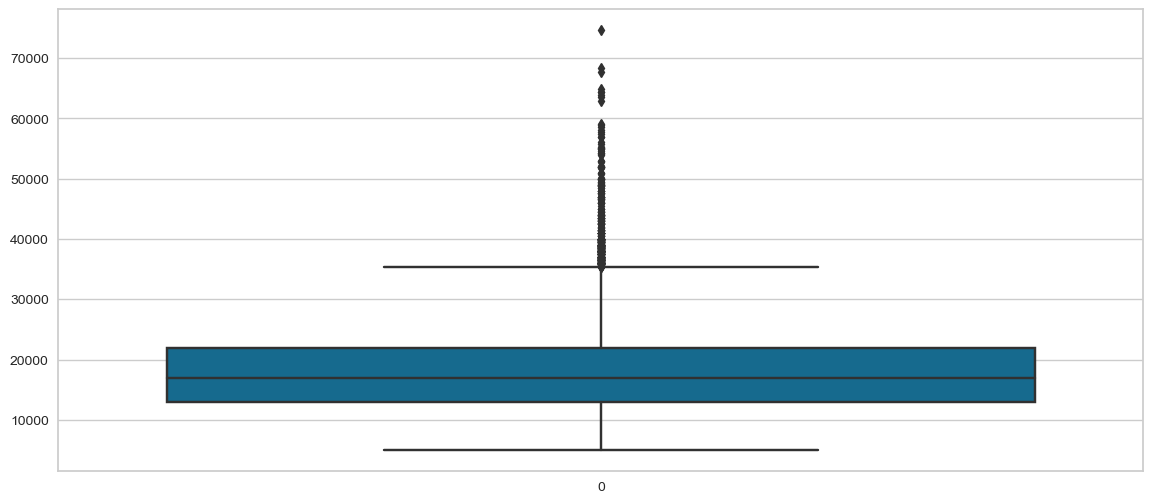

In [23]:
#Seeing teh boxplot of price
sns.boxplot(df['price'])
plt.show()
#As we can see, there are some outliers in price, i am going to drop them in the feature engineering part

In [24]:
#Seeing the value counts of price
df.price.value_counts()

price
14990    124
15990    121
15900    105
17990    100
10990     92
        ... 
20860      1
21005      1
21334      1
21360      1
39875      1
Name: count, Length: 2948, dtype: int64

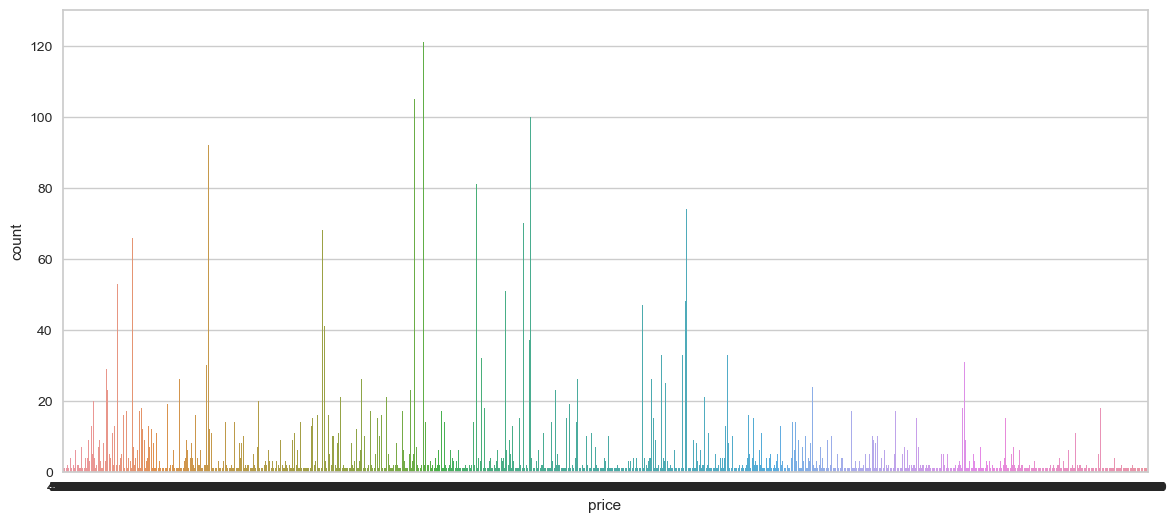

In [25]:
#Seeing the countplot of price
sns.countplot(x=df["price"])
plt.show()
#As we can see from the graph, there are a lot of values. So, it is not shown very well in this countplot

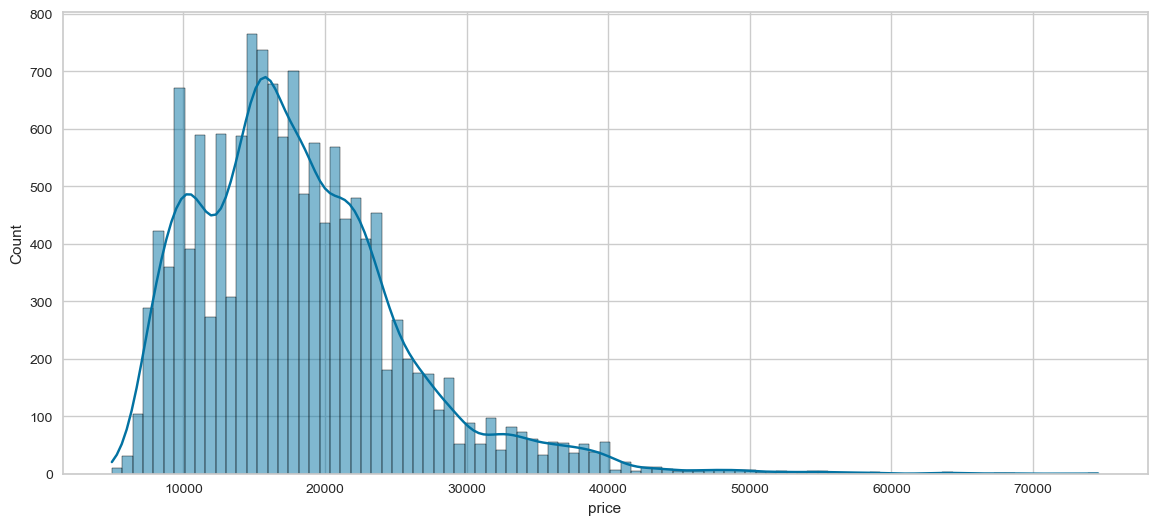

In [26]:
#Seeing the histplot of price
sns.histplot(df["price"], kde=True)
plt.show()
#As we can see, there are low values from about 40000 to 70000

### km

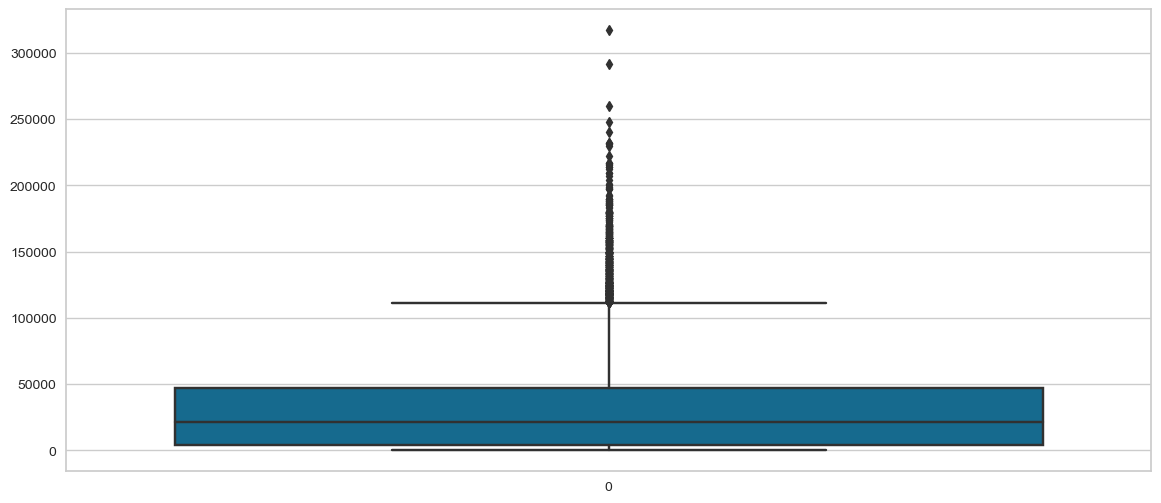

In [27]:
#SEeing teh boxplot of km
sns.boxplot(df['km'])
plt.show()
#As we can see, there are some outliers in km

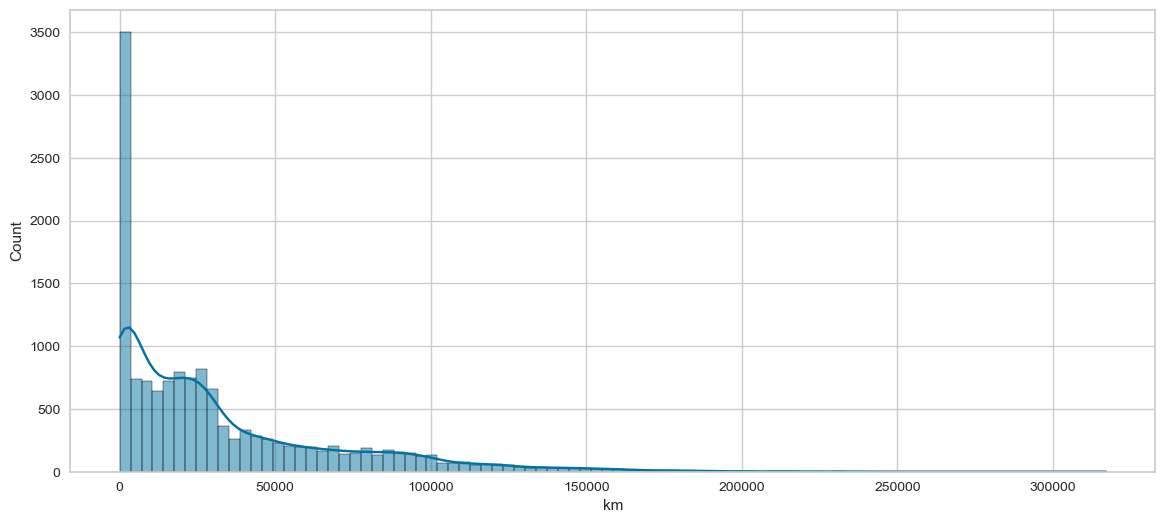

In [28]:
#Seeing the histplot of km
sns.histplot(df["km"], kde=True)
plt.show()

### age 

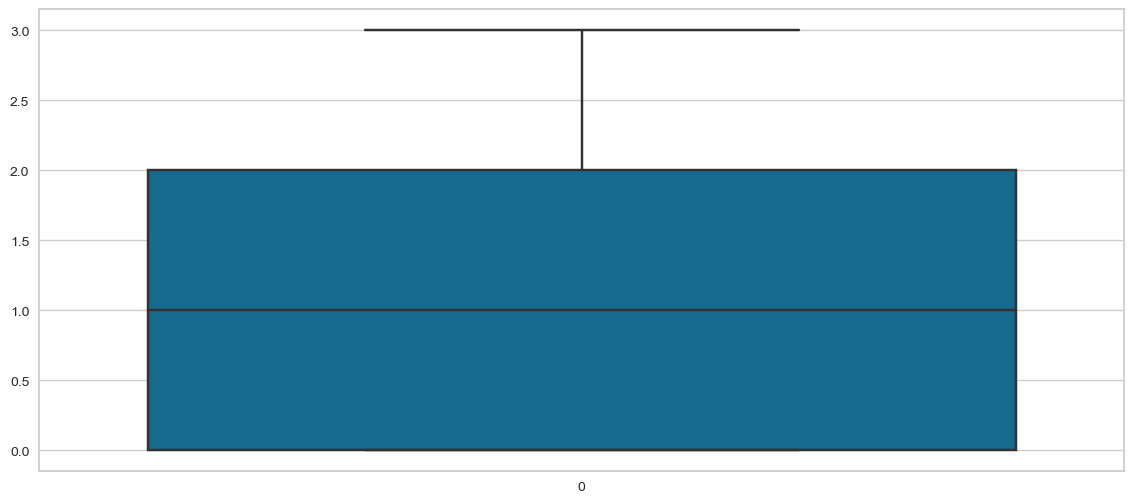

In [29]:
#Seeing teh boxplot of age
sns.boxplot(df['age'])
plt.show()
#As we can see, there is no outliers

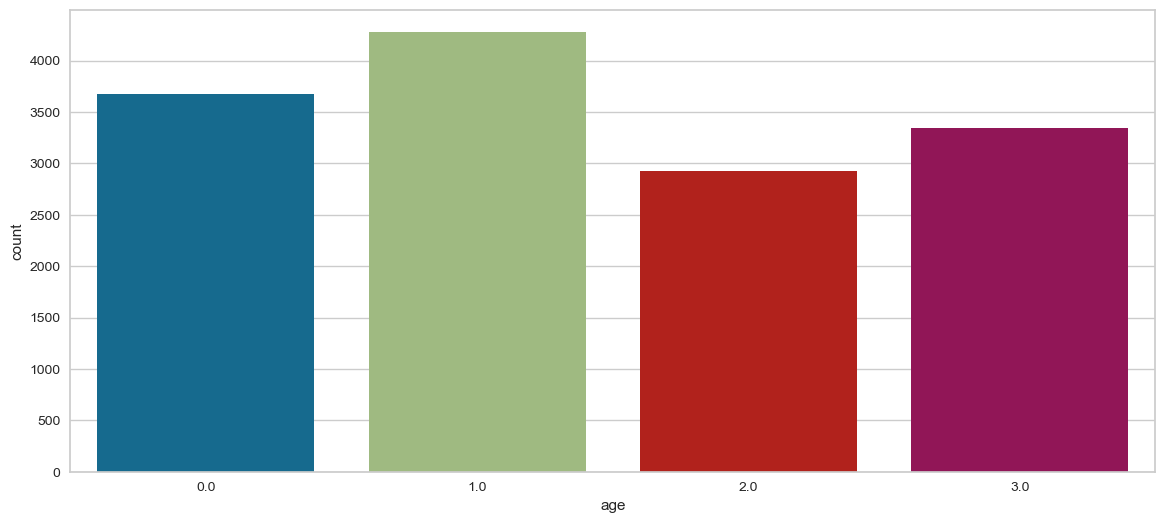

In [30]:
#Seeing the countplot of age
sns.countplot(x=df["age"])
plt.show()
#As we can see from the graph, there are 4 classes and class one is the highest

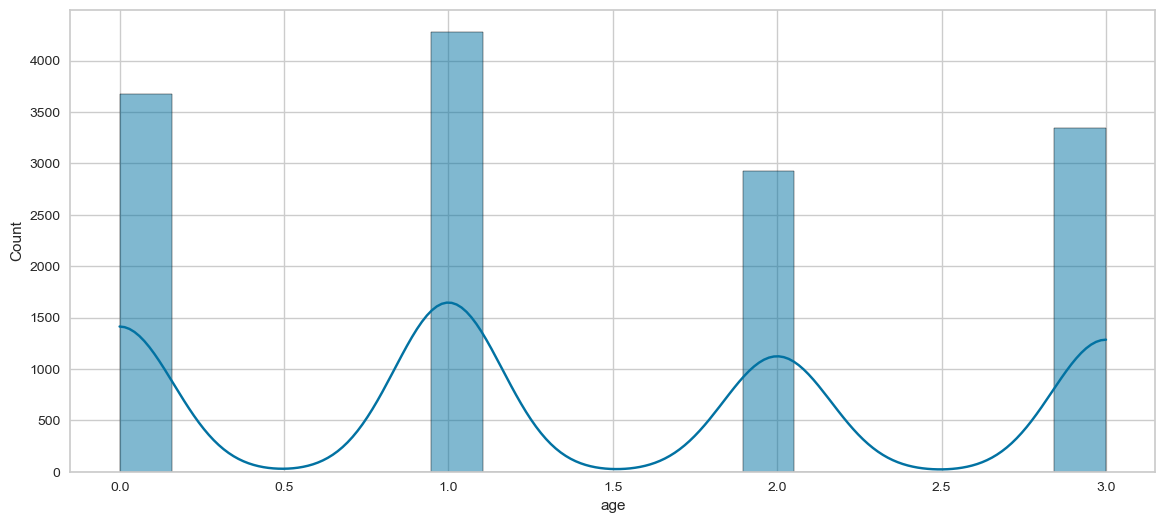

In [31]:
#Seeing the histplot of age
sns.histplot(df["age"], kde=True)
plt.show()

### hp_kW 

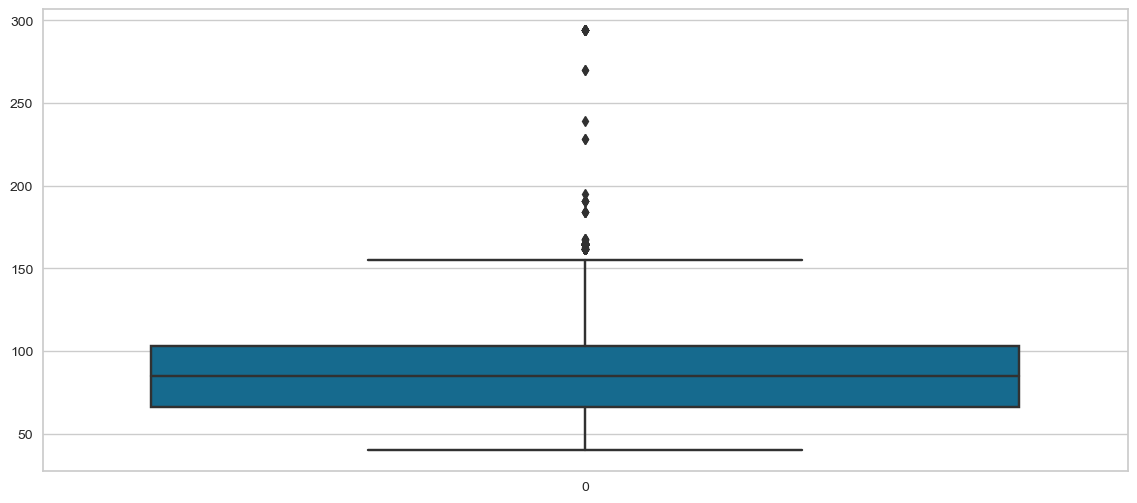

In [32]:
#SEeing teh boxplot of hp_kW
sns.boxplot(df['hp_kW'])
plt.show()
#As we can see, there are some outliers in hp_kW

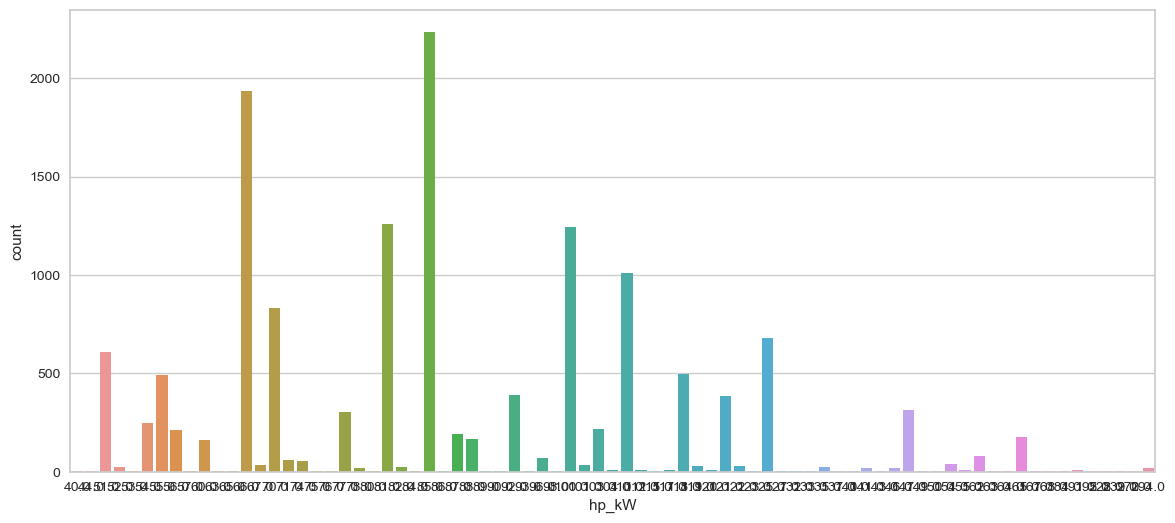

In [33]:
#Seeing the countplot of hp_kW
sns.countplot(x=df["hp_kW"])
plt.show()

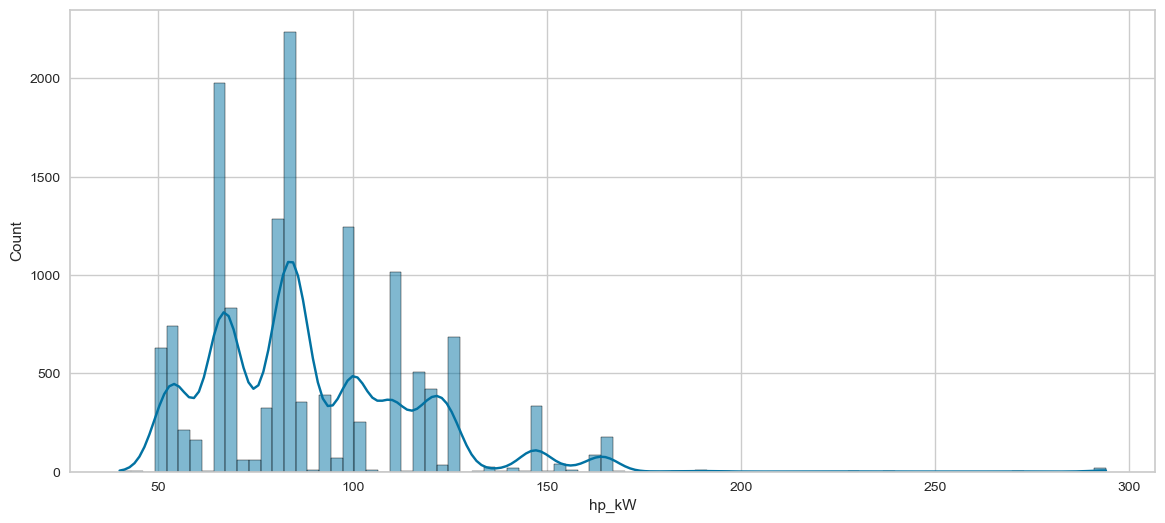

In [34]:
#Seeing the histplot of hp_kW
sns.histplot(df["hp_kW"], kde=True)
plt.show()

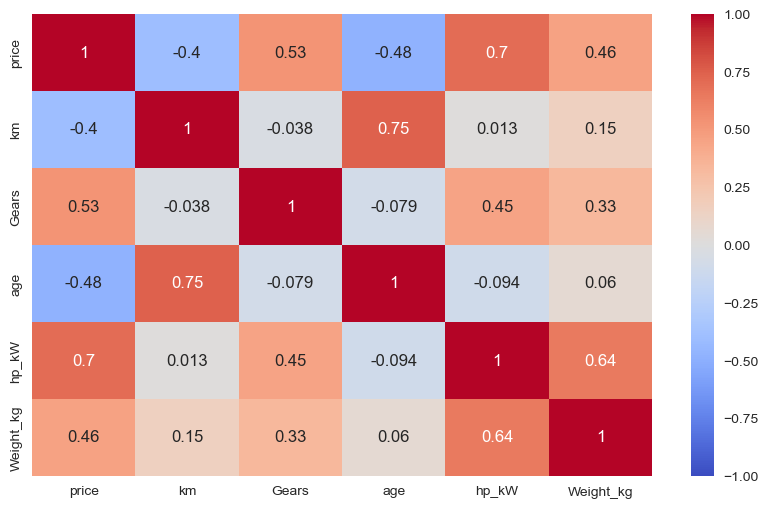

In [35]:
#Seeing the correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");
#As we can see, there is not correlation here

In [36]:
#Seeing the multicollinearity
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)].any().any()
#As we can see, we do not have multicollinearity

False

## Feature Engineering

In [37]:
#Seeing the head of the data 
df.head()
#Well, from the EDA, i can not see vat as a important feature, so i am going to drop it. The reason for this is that 
#this may affect our target which is the price, so in my opinio, dropping it is better

,make_model,price,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
0,Audi A1,15770,56013.000,7.000,3.000,66.000,Automatic,1220.000
1,Audi A1,14500,80000.000,7.000,2.000,141.000,Automatic,1255.000
2,Audi A1,14640,83450.000,7.000,3.000,85.000,Automatic,1135.000
3,Audi A1,14500,73000.000,6.000,3.000,66.000,Automatic,1195.000
4,Audi A1,16790,16200.000,7.000,3.000,66.000,Automatic,1135.000


In [38]:
#Seeing the head of the dataset after dropping vat
df.head()
#As we can see, we do not have vat column now

,make_model,price,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
0,Audi A1,15770,56013.000,7.000,3.000,66.000,Automatic,1220.000
1,Audi A1,14500,80000.000,7.000,2.000,141.000,Automatic,1255.000
2,Audi A1,14640,83450.000,7.000,3.000,85.000,Automatic,1135.000
3,Audi A1,14500,73000.000,6.000,3.000,66.000,Automatic,1195.000
4,Audi A1,16790,16200.000,7.000,3.000,66.000,Automatic,1135.000


In [39]:
#Seeing the object columns in the dataset and assignt it to a variable
df_ob = df.select_dtypes(include ="object").head()
df_ob
#As we can see, there are a lot of object columns in the dataset

,make_model,Gearing_Type
0,Audi A1,Automatic
1,Audi A1,Automatic
2,Audi A1,Automatic
3,Audi A1,Automatic
4,Audi A1,Automatic


In [40]:
#Dropping the prices that more than 40000
df = df[df['price'] < 40000]
df

,make_model,price,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
0,Audi A1,15770,56013.000,7.000,3.000,66.000,Automatic,1220.000
1,Audi A1,14500,80000.000,7.000,2.000,141.000,Automatic,1255.000
2,Audi A1,14640,83450.000,7.000,3.000,85.000,Automatic,1135.000
3,Audi A1,14500,73000.000,6.000,3.000,66.000,Automatic,1195.000
4,Audi A1,16790,16200.000,7.000,3.000,66.000,Automatic,1135.000
...,...,...,...,...,...,...,...,...
14216,Renault Espace,39980,100.000,6.000,0.000,118.000,Automatic,1734.000
14217,Renault Espace,39950,1647.363,6.000,0.000,147.000,Automatic,1758.000
14218,Renault Espace,39950,1000.000,6.000,0.000,165.000,Automatic,1734.000
14219,Renault Espace,39885,9900.000,7.000,0.000,165.000,Automatic,1708.000


In [41]:
#Seeing the prices after filtering
df.price

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
14216    39980
14217    39950
14218    39950
14219    39885
14220    39875
Name: price, Length: 14070, dtype: int64

In [42]:
#Seeing the sum of prices that are more than 40000
(df.price > 40000).sum()

0

In [43]:
#Seeing the prices that less than 40000
(df.price < 40000).sum()

14070

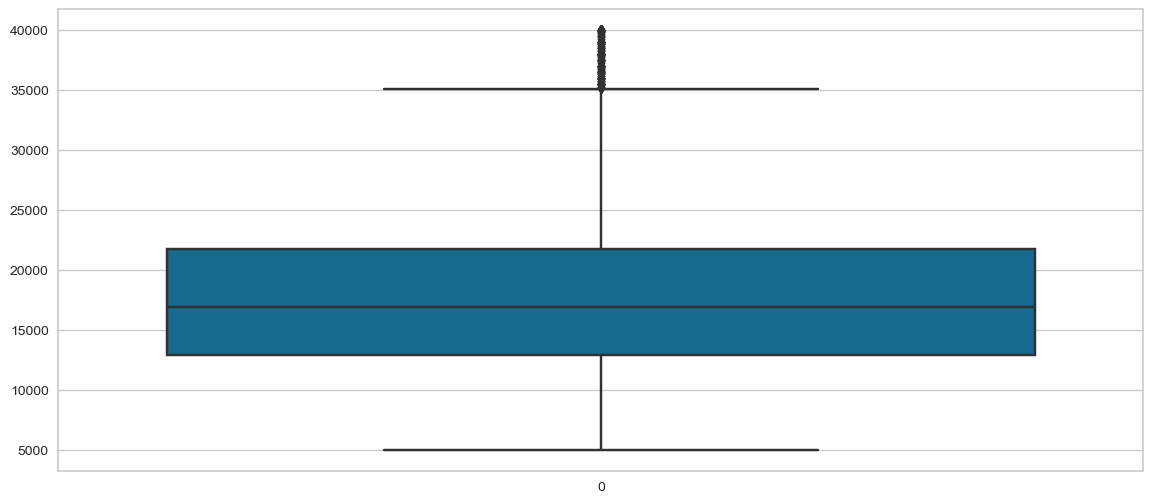

In [44]:
#SEeing teh boxplot of price after filterring 
sns.boxplot(df['price'])
plt.show()
#As we can see, there are some outliers in price, but it is not like before dropping them, the percentage now is low

In [45]:
df2 = df.copy()
df2.head()

,make_model,price,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
0,Audi A1,15770,56013.000,7.000,3.000,66.000,Automatic,1220.000
1,Audi A1,14500,80000.000,7.000,2.000,141.000,Automatic,1255.000
2,Audi A1,14640,83450.000,7.000,3.000,85.000,Automatic,1135.000
3,Audi A1,14500,73000.000,6.000,3.000,66.000,Automatic,1195.000
4,Audi A1,16790,16200.000,7.000,3.000,66.000,Automatic,1135.000


In [46]:
df2.to_csv('df2.csv', index=False)

In [47]:
df2

,make_model,price,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
0,Audi A1,15770,56013.000,7.000,3.000,66.000,Automatic,1220.000
1,Audi A1,14500,80000.000,7.000,2.000,141.000,Automatic,1255.000
2,Audi A1,14640,83450.000,7.000,3.000,85.000,Automatic,1135.000
3,Audi A1,14500,73000.000,6.000,3.000,66.000,Automatic,1195.000
4,Audi A1,16790,16200.000,7.000,3.000,66.000,Automatic,1135.000
...,...,...,...,...,...,...,...,...
14216,Renault Espace,39980,100.000,6.000,0.000,118.000,Automatic,1734.000
14217,Renault Espace,39950,1647.363,6.000,0.000,147.000,Automatic,1758.000
14218,Renault Espace,39950,1000.000,6.000,0.000,165.000,Automatic,1734.000
14219,Renault Espace,39885,9900.000,7.000,0.000,165.000,Automatic,1708.000


In [48]:
df2.columns

Index(['make_model', 'price', 'km', 'Gears', 'age', 'hp_kW', 'Gearing_Type',
       'Weight_kg'],
      dtype='object')

In [49]:
d = pd.read_csv('df2.csv')
d

,make_model,price,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
0,Audi A1,15770,56013.000,7.000,3.000,66.000,Automatic,1220.000
1,Audi A1,14500,80000.000,7.000,2.000,141.000,Automatic,1255.000
2,Audi A1,14640,83450.000,7.000,3.000,85.000,Automatic,1135.000
3,Audi A1,14500,73000.000,6.000,3.000,66.000,Automatic,1195.000
4,Audi A1,16790,16200.000,7.000,3.000,66.000,Automatic,1135.000
...,...,...,...,...,...,...,...,...
14065,Renault Espace,39980,100.000,6.000,0.000,118.000,Automatic,1734.000
14066,Renault Espace,39950,1647.363,6.000,0.000,147.000,Automatic,1758.000
14067,Renault Espace,39950,1000.000,6.000,0.000,165.000,Automatic,1734.000
14068,Renault Espace,39885,9900.000,7.000,0.000,165.000,Automatic,1708.000


## Modeling

### Train | Test Split

In [50]:
#Splitting the data to X and y
X = df.drop(columns="price")
y = df.price

In [51]:
#Seeing the head of X
X.head()

,make_model,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
0,Audi A1,56013.000,7.000,3.000,66.000,Automatic,1220.000
1,Audi A1,80000.000,7.000,2.000,141.000,Automatic,1255.000
2,Audi A1,83450.000,7.000,3.000,85.000,Automatic,1135.000
3,Audi A1,73000.000,6.000,3.000,66.000,Automatic,1195.000
4,Audi A1,16200.000,7.000,3.000,66.000,Automatic,1135.000


In [52]:
#seeing the head of y
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [53]:
#Seeing the shape of X and y
print('X shape is:', X.shape)
print('y shape is:', y.shape)

X shape is: (14070, 7)
y shape is: (14070,)


In [54]:
#Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=s)

In [55]:
#Seeing the shape of X_train and X_test
print('X_train, shape is:', X_train.shape)
print('X_test shape is:', X_test.shape)


#Seeing the shape of y_train and y_test
print('y_train, shape is:', y_train.shape)
print('y_test shape is:', y_test.shape)

X_train, shape is: (11256, 7)
X_test shape is: (2814, 7)
y_train, shape is: (11256,)
y_test shape is: (2814,)


In [56]:
#Seeing the head of X_train
X_train.head()

,make_model,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
8963,Opel Corsa,9.000,6.000,0.000,66.000,Automatic,1163.000
13900,Renault Espace,21709.000,6.000,2.000,118.000,Automatic,1734.000
11322,Opel Insignia,1647.363,6.000,0.000,100.000,Automatic,1487.000
2917,Audi A3,156000.000,6.000,3.000,81.000,Manual,1335.000
10780,Opel Insignia,29900.000,6.000,1.000,125.000,Automatic,1487.000


In [57]:
#Seeing the head of X_test
X_test.head()

,make_model,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
2102,Audi A1,4500.000,5.000,0.000,66.000,Manual,1135.000
1985,Audi A1,7500.000,7.000,0.000,85.000,Automatic,1680.000
11624,Opel Insignia,1647.363,6.000,0.000,121.000,Manual,1487.000
666,Audi A1,11707.000,5.000,1.000,60.000,Manual,1110.000
7689,Opel Corsa,22635.000,6.000,3.000,66.000,Automatic,1203.000


In [58]:
#Seeing the head of y_train
y_train.head()

8963     16990
13900    29990
11322    34490
2917     11990
10780    23970
Name: price, dtype: int64

In [59]:
#Seeing the head of y_test
y_test.head()

2102     20000
1985     24999
11624    33335
666      14220
7689     11990
Name: price, dtype: int64

In [60]:
#Seeing the object classes in the data set
df.select_dtypes(include="object").head(1)

,make_model,Gearing_Type
0,Audi A1,Automatic


In [61]:
#Object columns
cat_ob = X_train.select_dtypes("object").columns
cat_ob

Index(['make_model', 'Gearing_Type'], dtype='object')

In [62]:
#Converting the object values to numeric values
ord_enc = OrdinalEncoder()
trans = make_column_transformer((ord_enc, cat_ob), remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")

In [63]:
#Seeing the head of X_train
X_train.head()

,make_model,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
8963,Opel Corsa,9.000,6.000,0.000,66.000,Automatic,1163.000
13900,Renault Espace,21709.000,6.000,2.000,118.000,Automatic,1734.000
11322,Opel Insignia,1647.363,6.000,0.000,100.000,Automatic,1487.000
2917,Audi A3,156000.000,6.000,3.000,81.000,Manual,1335.000
10780,Opel Insignia,29900.000,6.000,1.000,125.000,Automatic,1487.000


In [64]:
#Fitting the trans with X_train
X_train_trans = trans.fit_transform(X_train)

#Fitting the trans with X_test
X_test_trans = trans.transform(X_test)

In [65]:
#Seeing X_train_trans after converting
X_train_trans

,make_model,Gearing_Type,km,Gears,age,hp_kW,Weight_kg
8963,3.000,0.000,9.000,6.000,0.000,66.000,1163.000
13900,6.000,0.000,21709.000,6.000,2.000,118.000,1734.000
11322,4.000,0.000,1647.363,6.000,0.000,100.000,1487.000
2917,1.000,1.000,156000.000,6.000,3.000,81.000,1335.000
10780,4.000,0.000,29900.000,6.000,1.000,125.000,1487.000
...,...,...,...,...,...,...,...
5718,2.000,1.000,36600.000,5.000,3.000,77.000,1263.000
8029,3.000,0.000,8930.000,6.000,1.000,66.000,1203.000
1361,0.000,0.000,7987.000,7.000,1.000,141.000,1135.000
1547,0.000,0.000,6600.000,7.000,1.000,85.000,1135.000


In [66]:
#Seeing X_train without transforming or using encoder on it
X_train

,make_model,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
8963,Opel Corsa,9.000,6.000,0.000,66.000,Automatic,1163.000
13900,Renault Espace,21709.000,6.000,2.000,118.000,Automatic,1734.000
11322,Opel Insignia,1647.363,6.000,0.000,100.000,Automatic,1487.000
2917,Audi A3,156000.000,6.000,3.000,81.000,Manual,1335.000
10780,Opel Insignia,29900.000,6.000,1.000,125.000,Automatic,1487.000
...,...,...,...,...,...,...,...
5718,Opel Astra,36600.000,5.000,3.000,77.000,Manual,1263.000
8029,Opel Corsa,8930.000,6.000,1.000,66.000,Automatic,1203.000
1361,Audi A1,7987.000,7.000,1.000,141.000,Automatic,1135.000
1547,Audi A1,6600.000,7.000,1.000,85.000,Automatic,1135.000


In [67]:
#Seeing the shape of X_train_trans and X_test_trans
X_train_trans.shape, X_test_trans.shape 

((11256, 7), (2814, 7))

In [68]:
#Seeing the head of X_train_trans
X_train_trans.head()

,make_model,Gearing_Type,km,Gears,age,hp_kW,Weight_kg
8963,3.000,0.000,9.000,6.000,0.000,66.000,1163.000
13900,6.000,0.000,21709.000,6.000,2.000,118.000,1734.000
11322,4.000,0.000,1647.363,6.000,0.000,100.000,1487.000
2917,1.000,1.000,156000.000,6.000,3.000,81.000,1335.000
10780,4.000,0.000,29900.000,6.000,1.000,125.000,1487.000


In [69]:
#Seeing the head of X_test_trans
X_test_trans.head()

,make_model,Gearing_Type,km,Gears,age,hp_kW,Weight_kg
2102,0.000,1.000,4500.000,5.000,0.000,66.000,1135.000
1985,0.000,0.000,7500.000,7.000,0.000,85.000,1680.000
11624,4.000,1.000,1647.363,6.000,0.000,121.000,1487.000
666,0.000,1.000,11707.000,5.000,1.000,60.000,1110.000
7689,3.000,0.000,22635.000,6.000,3.000,66.000,1203.000


#### Eval Function

In [70]:
#Creating the eval function to see the metrics
# Pre-defined functions

def eval(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)


# Adjusted R2 Score
def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


### RF Model

In [71]:
#Creating the model of rf with the best params
rf_model = RandomForestRegressor(max_depth= 10, max_features = 4, n_estimators= 300,  random_state=s)

#the operations of the pipeline
operations = [("encoder", trans), ("RF_model", rf_model)]
#Creating the pipeline
pipe_rf_m = Pipeline(steps=operations)
#Fitting the model with the training data
pipe_rf_m.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'Gearing_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features=4,
                                       n_estimators=300, random_state=101))])

In [72]:
#seeing the result of the grid search model
eval(pipe_rf_m, X_train, y_train, X_test, y_test)
#From here, we can see that the result is better now, but for mse, it is still huge.

,train,test
R2,0.955,0.940
mae,984.458,1121.068
mse,2047191.461,2736831.357
rmse,1430.801,1654.337


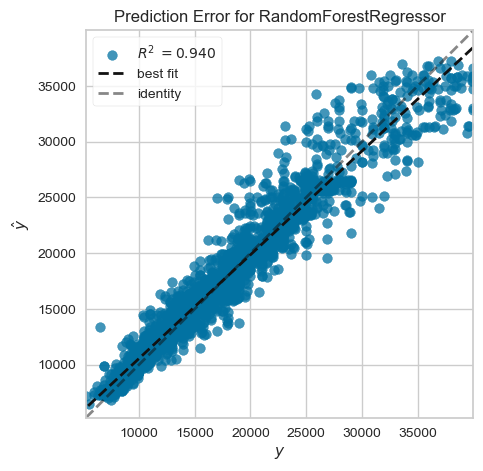

In [73]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(pipe_rf_m)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line, it nearly started to be different from around 30000

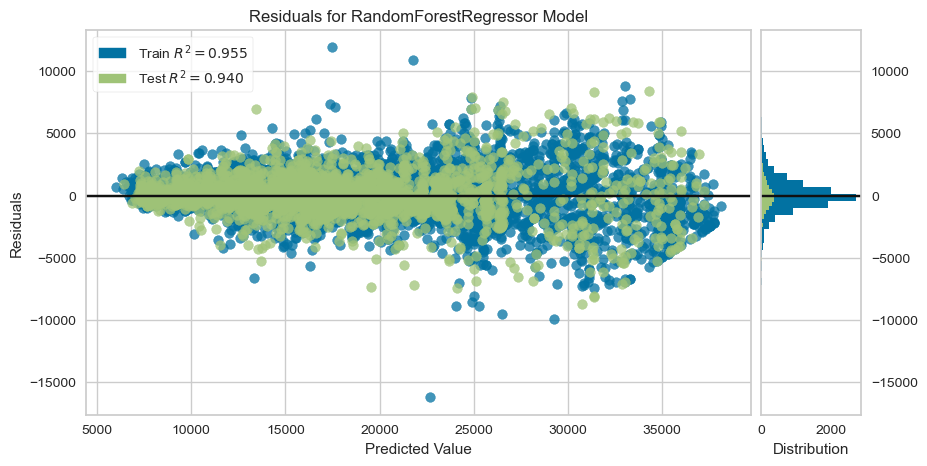

In [74]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(pipe_rf_m)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes, and it started from about 30000

In [75]:
#Prediction X_test
y_pred = pipe_rf_m.predict(X_test)

In [76]:
#Saving the result to use them later
rf_R2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [77]:
#Printing the result
print('linear_R2', rf_R2)
print('linear_mae', rf_mae)
print('linear_rmse', rf_rmse)

linear_R2 0.940345540137606
linear_mae 1121.068195034202
linear_rmse 1654.3371352133074


## Final Modle

In [78]:
#Creating the model of rf with the best params
rf = RandomForestRegressor(max_depth= 10, max_features = 4, n_estimators= 300,  random_state=s)

#the operations of the pipeline
operations = [("encoder", trans), ("RF_model", rf)]
#Creating the pipeline
final_rf = Pipeline(steps=operations)
#Fitting the model with the whole data
final_rf.fit(X, y)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'Gearing_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features=4,
                                       n_estimators=300, random_state=101))])

In [79]:
df.columns

Index(['make_model', 'price', 'km', 'Gears', 'age', 'hp_kW', 'Gearing_Type',
       'Weight_kg'],
      dtype='object')

In [80]:
my_dict = {
    'make_model': 'Renault Espace',
    'km': 80000.000,
    'Type': 'Used', 
    'Gears': 7.000, 
    'age': 2.000,
    'hp_kW': 66.000,
    'Gearing_Type': 'Automatic',
    'Weight_kg': 1734.000,
}

In [81]:
data = pd.DataFrame.from_dict([my_dict])
data

,make_model,km,Type,Gears,age,hp_kW,Gearing_Type,Weight_kg
0,Renault Espace,80000.000,Used,7.000,2.000,66.000,Automatic,1734.000


In [82]:
prediction = final_rf.predict(data)
print(prediction)

[15154.94148048]


In [83]:
print("The estimated price is {}. ".format(int(prediction[0])))

The estimated price is 15154. 


## Saving the model

In [84]:
pickle.dump(final_rf, open('final_rf', 'wb'))

## deployment

In [85]:
new_model = pickle.load(open('final_rf', 'rb'))

### Predicgion

In [86]:
df.make_model

0               Audi A1
1               Audi A1
2               Audi A1
3               Audi A1
4               Audi A1
              ...      
14216    Renault Espace
14217    Renault Espace
14218    Renault Espace
14219    Renault Espace
14220    Renault Espace
Name: make_model, Length: 14070, dtype: object

In [101]:
my_dict2 = {
    'make_model': 'Audi A3',
    'km': 162000,
    'Gears': 1.0000, 
    'age': 1.000,
    'hp_kW': 140,
    'Gearing_Type': 'Automatic',
    'Weight_kg': 1500,
}

In [102]:
df.Weight_kg.max()

2471.0

In [103]:
df.Weight_kg.min()

840.0

In [104]:
data2 = pd.DataFrame.from_dict([my_dict2])
data2

,make_model,km,Gears,age,hp_kW,Gearing_Type,Weight_kg
0,Audi A3,162000,1.000,1.000,140,Automatic,1500


In [105]:
prediction2 = new_model.predict(data2)
print(prediction2)

[17825.33042645]


In [106]:
print("The estimated price is {}. ".format(int(prediction2[0])))

The estimated price is 17825. 


In [91]:
prediction3 = new_model.predict(data)
print(prediction3)

[15154.94148048]


In [92]:
print("The estimated price is {}. ".format(int(prediction3[0])))

The estimated price is 15154. 


In [98]:
df.Gearing_Type.unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [93]:
conda env list

# conda environments:
#
base                  *  C:\Users\habob\anaconda3
env_name                 C:\Users\habob\anaconda3\envs\env_name


Note: you may need to restart the kernel to use updated packages.


In [94]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
alembic                       1.12.0
altair                        4.2.2
anaconda-anon-usage           0.4.3
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-tim

In [95]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [96]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
alembic                       1.12.0
altair                        4.2.2
anaconda-anon-usage           0.4.3
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-tim

In [ ]:
!streamlit run my_app.py

In [ ]:
df.columns

In [ ]:
df.make_model.value_counts()

In [ ]:
'Audi A3', 'Opel Insignia', 'Audi A1', 'Opel Astra', 'Opel Corsa', 'Renault Clio', 'Renault Espace'

In [ ]:
df.hp_kW.value_counts()

In [ ]:
df.hp_kW.max()

In [ ]:
df.hp_kW.min()